# Machine Learning Pipelines 

## Components vs Artifacts

An Machine Learning pipeline is made of:

__Components__ (or steps): independent, reusable and modular pieces of software that receive one or more inputs and produce one or more output. They can be scripts, notebooks or other executables.

__Artifacts__: the product of components. They can become the inputs of one or more subsequent components, thereby linking together the steps of the pipeline. Artifacts must be tracked and versioned.

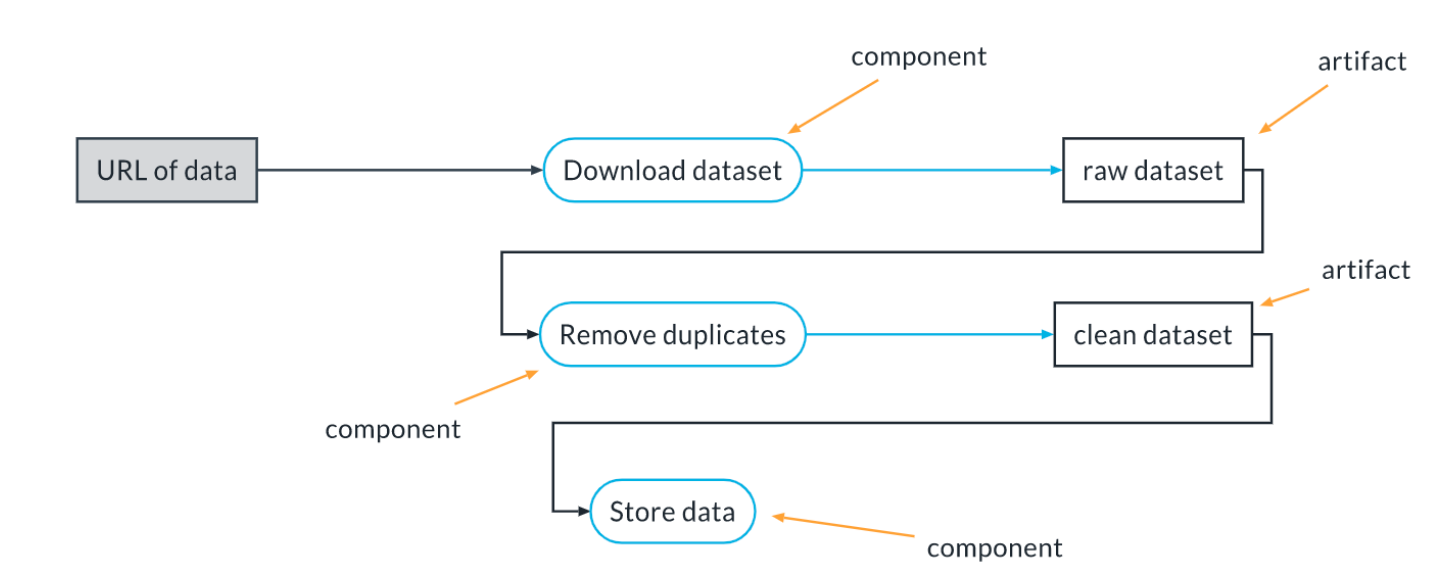

## 3 Levels of MLOPS

### Level 0 : 
This is the level where there is no MLops process.

- The code is monolithic - one or few scripts or Jupyter notebooks
- The target of the development is a model, and not a ML pipeline

### Level 1 :
The target of the development is a ML pipeline that can produce a model at any time.

- The pipeline is made with reusable components
- You are tracking code, artifacts and experiments for reproducibility and transparency
- The model is monitored in production

### Level 2 :
This is the process for mature, large scale ML companies. Here we shift our focus from developing ML pipelines to improving the pipeline components. This assumes we already have several ML pipelines in production. The automation at this level is much higher

- Continuous integration: every time a component is changed integration tests are run to ensure that the component works as expected
- Continuous deployment: each component passing the tests is automatically deployed and starts running as part of the ML pipelines in production
- Continuous Training: when a component changes or when new data arrives the ML pipelines are triggered and new models are trained, tested and deployed automatically

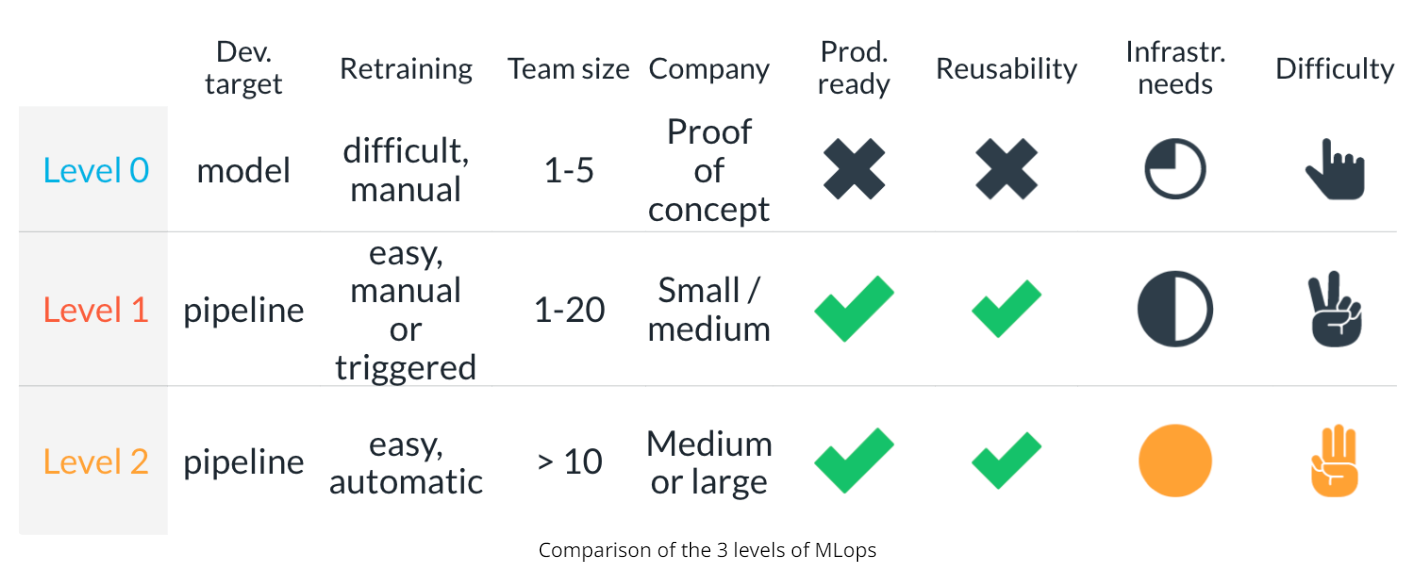


## Arg parse (reminder)



In [ ]:
import argparse

# Create the parser
parser = argparse.ArgumentParser(description='Example of argparse')

# Add arguments
parser.add_argument("--number_1", type=float, help="First number", required=True)
parser.add_argument("--number_2", type=int, help="Second number", required=False, default=3)

# Parse the arguments
args = parser.parse_args()

# Access the parsed arguments
print('Input file:', args.input_file)
print('Output file:', args.output_file)
print('Verbose mode:', args.verbose)


In [ ]:
python my_script.py --number_1 1.2 --number_2 3


## Weights And Biases (W&B)
#### Weights and Biases (W&B) offers several advantages that make it highly useful for machine learning pipelines:

- __Experiment Tracking__: W&B allows you to track and compare different experiments within your machine learning pipeline. This includes variations in hyperparameters, model architectures, datasets, and more. It helps in understanding what works best and facilitates iterative improvements.

- __Visualization__: It provides a rich dashboard to visualize metrics, model performance, and system behavior across different experiments. Visualization is crucial for gaining insights into model behavior and making informed decisions.

- __Hyperparameter Optimization__: W&B assists in tuning hyperparameters by tracking their values across different runs. This facilitates optimization strategies like grid search, random search, or more advanced techniques like Bayesian optimization.

- __Artifact Management__: Tracking artifacts such as model weights, visualizations, datasets, and code versions across different runs and experiments helps maintain a clear history and reproducibility.

- __Performance Monitoring__: W&B can monitor and alert users about model performance degradation or anomalies, allowing for proactive intervention and maintenance of model quality.


#### Here are some  concepts related to Weights & Biases (W&B) and how they work together:
- __Run:__ The basic unit of computation in W&B. Corresponds to the execution of a script or a Jupyter notebook. Each run is automatically assigned a unique name, but you can force a specific name. You can attach parameters, metrics, artifacts, images/plots to a run.

- __Experiment:__ A grouping of one or more runs. Useful to collect the execution of an entire pipeline where each component has its own run. Allows comparison between different experiments in the W&B interface. All metrics collected by runs become metrics of the experiment. Experiment names can be indicated using the group keyword in wandb.init.

- __Project:__ A collection of runs, experiments, and artifacts related to a specific objective. Gathers all work related to the same goal in one place. You view one project at a time in W&B.

- __Artifact:__ : Any file or directory produced by your code during a run. Each logged artifact is automatically versioned by W&B. If two runs produce an artifact with the same name but different content, W&B generates multiple versions. If two runs produce identical artifacts, W&B recognizes this and doesn't generate a new version.

- __wandb.init():__ Method to start a run in W&B. Arguments like project, group, and job_type can be passed to wandb.init() to organize runs within projects and experiments. job_type specifies the function of your script, which can be helpful in visualizing the pipeline.

In [ ]:
#Run Example
run = wandb.init(project="exercise_1", group="experiment_1", job_type="upload_file")

In this example the run will have a random name , and it will be under experiment_1 and will be under the project exercise_1

In [ ]:
#Artifact Example 
artifact = wandb.Artifact(
        name=args.artifact_name,
        type=args.artifact_type ,
        description=args.artifact_description,
        )
artifact.add_file(args.input_file)
run.log_artifact(artifact)
run.finish() # Artifact will only be uploaded when we execute this line

in this example we defined an artifact and gave it a path to a file in our local system , now this artifact will be uploaded to W&B only after the run finishes


once an artifact is created and logged in a project, you can access and use that artifact in subsequent runs within the same or different projects. Here's how you can use an artifact in a run

In [ ]:
#Using Artifact example 
run = wandb.init(project="exercise_1", job_type="use_file")
# Initialize W&B
wandb.init(project="your_project_name")

# Access the artifact
artifact = wandb.use_artifact('username/project_name/artifact_name:version', type='dataset')

# Use the artifact in your run
# For example, load a dataset from the artifact
your_dataset = artifact.download()

# Assuming the CSV file is named 'data.csv', load it into a Pandas DataFrame
file_path = os.path.join(artifact_dir, 'data.csv')  # Replace 'data.csv' with your CSV file name
data = pd.read_csv(file_path)


## MLFLOW

MLflow Projects are a way to package and describe your machine learning code in a reusable and reproducible format. They allow you to specify dependencies, code, and configurations needed to run your machine learning code in a consistent manner across different environments.

#### The main components of an MLflow Project are:

- __MLproject File__:
The MLproject file is a YAML file that defines your project's structure, dependencies, entry points, and configurations.
It specifies the environment (Conda or Docker), entry points for running code, and parameters that can be passed to your code.


- __Code:__ Your machine learning code or scripts that perform tasks like data ingestion, model training, evaluation, and inference.These scripts should use MLflow Tracking APIs to log parameters, metrics, and artifacts.


- __Dependencies:__ Specify the dependencies (Python libraries or packages) required to run your code. MLflow allows you to define these dependencies in the MLproject file using Conda environments or Docker containers for reproducibility.

In [ ]:
# Dependencies example , should be stored in a conda.yml file
name: preprocess
channels:
  - conda-forge
  - defaults
dependencies:
  - pandas=2.1.4
  - pip=23.3.1
  - pyarrow=14.0
  - pip:
      - wandb==0.16.1

- the channels section specifies the locations or repositories where Conda looks for packages when resolving dependencies.
- Conda-forge is a community-driven collection of Conda packages maintained and contributed by users , it has popular packages like pandas , numpy , matplot , seaborn ...
    

In [ ]:
# Project definition example  The project definition is contained in a YAML file called MLProject (without .yml nor .yaml extension)

name: download_data
conda_env: conda.yml

entry_points:
  main:
    parameters:
      file_url:
        description: URL of the file to download
        type: uri
      artifact_name:
        description: Name for the W&B artifact that will be created
        type: str

    command: >-
      python download_data.py --file_url {file_url} \
                              --artifact_name {artifact_name}

- the conda_env: conda.yml section specifies that this is a conda-based project (as opposed to a Docker-based project).


#### Running the project
Running a MLflow project is accomplished with the mlflow run command, followed by a location specifier


In [ ]:
mlflow run /path/to/the/local/folder

mlflow run git@github.com/my_username/my_repo.git

mlflow run ./my_project -P file_url=https://myurl.com -P artifact_name=my-artifact

mlflow run git@github.com/my_username/my_repo.git -v 1.2.3

## Linking Components Together

#### ML pipeline in MLFLOW
basicaly it is a project that will call other projects

We have a main script. which we will called main.py, that contains several calls to mlflow.run, one for each component to call. mlflow.run is the equivalent of the command mlflow run and it allows to run a component from a script. Each component is called from the main script and it produces one ore more output artifacts that are stored in the artifact store (W&B for us). The output of one component becomes the input to the next. So the artifacts are the glue linking together the components into the pipeline. Of course

__Example__
Suppose we have these projects
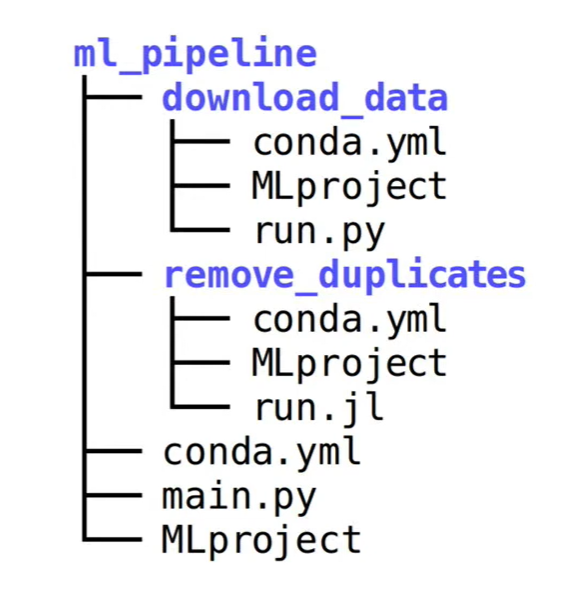

We will execute the pipeline use the main python script as follows

In [ ]:
import mlflow

mlflow.run(
  uri="download_data",
  entry_point="main",
  parameters={
    "file_url": "https://...",
    "output_artifact": "raw_data.csv"
  }
)

mlflow.run(
  uri="remove_duplicates",
  entry_point="main",
  parameters={
    "input_artifact": "raw_data.csv:latest",
    "output_artifact": "clean_data.csv"
  }
)

## Hydra
Hydra is a package to configure complex applications. It allows to define configuration files containing default values for all the parameters, so that it is easier to keep track of them and to know what they are for.


In [ ]:
#Hydra config file , it will be named config.yaml
main:
  project_name: my_project
  experiment_name: dev
data:
  train_data: "exercise_6/data_train.csv:latest"
random_forest_pipeline:
  random_forest:
    n_estimators: 100
    criterion: gini
    max_depth: null

In [ ]:
#To use it in your code
import mlflow
import hydra

@hydra.main(config_name="config")
def go(config):
  # Now here config is a dictionary with our configuration
  # For example, to access the parameter train_data in the data
  # section we can just do
  train_data = config["data"]["train_data"]

  ...


if __name__=="__main__":
  go()

When using Hydra for our main script, we need to change the MLproject file to allow us to override the parameters written in the configuration file:



In [ ]:
name: main
conda_env: conda.yml

entry_points:
  main:
    parameters:
      hydra_options:
        description: Hydra parameters to override
        type: str
        default: ''
    command: >-
      python main.py $(echo {hydra_options})

With this in place, we can run the pipeline using the default for all parameters by just running mlflow run [path or URL to the pipeline]. We can also override any parameter. For example, to set the experiment_name parameter in the main section to my_experiment we can do:

In [ ]:
mlflow run [path or URL to the pipeline] \
       -P hydra_options="main.experiment_name=my_experiment"

mlflow run [path or URL to the pipeline] \
       -P hydra_options="main.experiment_name=my_experiment main.project_name=test"

#### Useful trick
When tracking ML pipelines with W&B there is a very useful trick that ensures that the pipeline is grouped together in one single experiment within the appropriate project. We need to set two environment variables as part of our main script (which we called main.py). These are:

- WANDB_PROJECT, which sets the default project
- WANDB_RUN_GROUP, which sets the default experiment name

Since we are defining these within the main script, they will only apply to the runs generated by the components called by the main script.

In [ ]:
import hydra
import mlflow
import os

@hydra.main(config_name="config")
def go(config):
  
  os.environ["WANDB_PROJECT"] = config["main"]["project_name"]
  os.environ["WANDB_RUN_GROUP"] = config["main"]["experiment_name"]
  
  mlflow.run(
    ...
  )
  
  ...
  
 
if __name__ == "__main__":
  go()

# EDA
The Exploratory Data Analysis is one of the first steps we typically execute in a project, before we jump into developing the ML pipeline. It is important to:

- Maximize our understanding of the data (types, ranges, cardinality, correlations, outliers...)
- Identify and correct data problems
- Test our assumptions about the problem
- Uncover data biases that can result in a biased model (for example, an unfair model with respect to some protected category)

__some things to look at are:__

- Understand what each feature means
- Univariate analysis to verify that our expectation on that feature matches reality
- Bivariate analysis where we look for correlations
- Anomaly detection
- Missing values handling

### Add EDA into pipeline
Even though the EDA is an interactive step, we want to make it reproducible and to track it. A simple strategy to accomplish this is:
- Write an MLflow component that installs Jupyter and all the libraries that we need, and execute the EDA as a notebook from within this component
- Embed plots and comments into the Jupyter notebook itself
- Track inputs and outputs of the notebook with your artifact tracking, in our case Weights & Biases

Tracking a notebook in W&B is as simple as adding the save_code=True option when creating the run:

In [ ]:
run = wandb.init(
  project="my_exercise",
  save_code=True
)

### Pandas profiling
Pandas-profiling is a tool to help with the EDA. A profile is an interactive visualization of the main characteristics of the dataset. It can be generated with:

In [ ]:
import pandas_profiling
import pandas as pd

df = pd.read_parquet("genres_mod.parquet")
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

# pre-processing
The pre-processing step is right at the beginning of the ML pipeline, just after data fetching. It implements the cleaning steps and other pre-processing that we have learned during the EDA.

# Data segregation
This step comes in our ML pipeline just after the data checks ,  it divides the dataset into a test set and a train/validation dataset
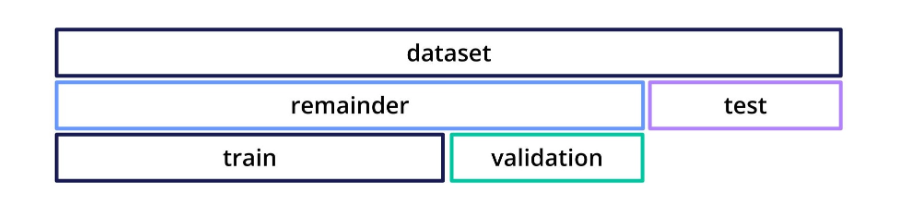

# Data validation

We perform data validation in order to verify that our assumptions about the data are correct and stay correct even for new datasets. This latter point is not guaranteed. Indeed, the data can change for many reasons:

Bugs are introduced upstream (for example in ETL pipelines- )
Changes in the source of the data are not communicated properly and produce unexpected changes in the input da- ta
The world changes and the distribution of the input data cha

  ![image.png](attachment:634e5101-9fd7-46ac-aa5a-aea3a61e95fe.png)nges

### Deterministic tests
Deterministic testing within data validation refers to the systematic verification of measurable attributes in a dataset. These tests are objective, quantifiable, and free from random or uncertain outcomes. These tests aim to confirm certain properties or conditions of the dataset based on defined rules or expectations.

sius).

__Examples__

1. Number of Columns in a Dataset: This test simply checks if the dataset has the expected number of columns. For instance, verifying that a dataset has 10 columns.
  
2. Length of the Dataset: Verifying the number of records or rows in the dataset. For example, ensuring a dataset contains 1000 records

3. Distinct Values in a Categorical Variable: Checking the unique values present in a categorical column. For instance, ensuring that a column meant to contain gender categories (e.g., 'Male', 'Female') only contains these specific values.

4. Legal Range for a Numerical Variable: Validating the range of a numerical column. For example, ensuring that a column representing lengths or sizes doesn't contain negative values (length > 0) or falls within a predefined range (e.g., temperatures between 0 and 100 degrees Celsius).

In [1]:
# data_validator.py
def test_number_of_columns(dataset):
    expected_columns = 10  # Define the expected number of columns
    assert len(dataset.columns) == expected_columns, f"Expected {expected_columns} columns, but got {len(dataset.columns)}"

# data_validator.py
def test_dataset_length(dataset):
    expected_length = 1000  # Define the expected number of records
    assert len(dataset) == expected_length, f"Expected {expected_length} records, but got {len(dataset)}"

# data_validator.py
def test_unique_values_in_column(dataset):
    expected_unique_values = {'Male', 'Female'}  # Define expected unique values
    actual_unique_values = set(dataset['gender_column'].unique())  # Replace 'gender_column' with your column name
    assert actual_unique_values == expected_unique_values, f"Unexpected unique values: {actual_unique_values}"

# data_validator.py
def test_legal_range_for_numerical_variable(dataset):
    min_value = 0  # Define the minimum acceptable value
    numerical_column = 'length'  # Replace with your numerical column name
    assert (dataset[numerical_column] >= min_value).all(), f"Values in {numerical_column} should be greater than or equal to {min_value}"


pytest data_validator.py


### Non-Deterministic tests
A test is non-deterministic when it involves measuring a quantity with intrinsic uncertainty (a random variable). For this reason, it involves Statistical Hypothesis Testing.

Most non-deterministic tests compare the present dataset with a previous one that is used as a reference.

Some examples of non-deterministic tests are:

Check the mean and/or standard deviation of columns
Check the level of correlations between columns, or a column and the target
Check the distribution of values within one or more columns
Check for outliers

## Inference pipeline
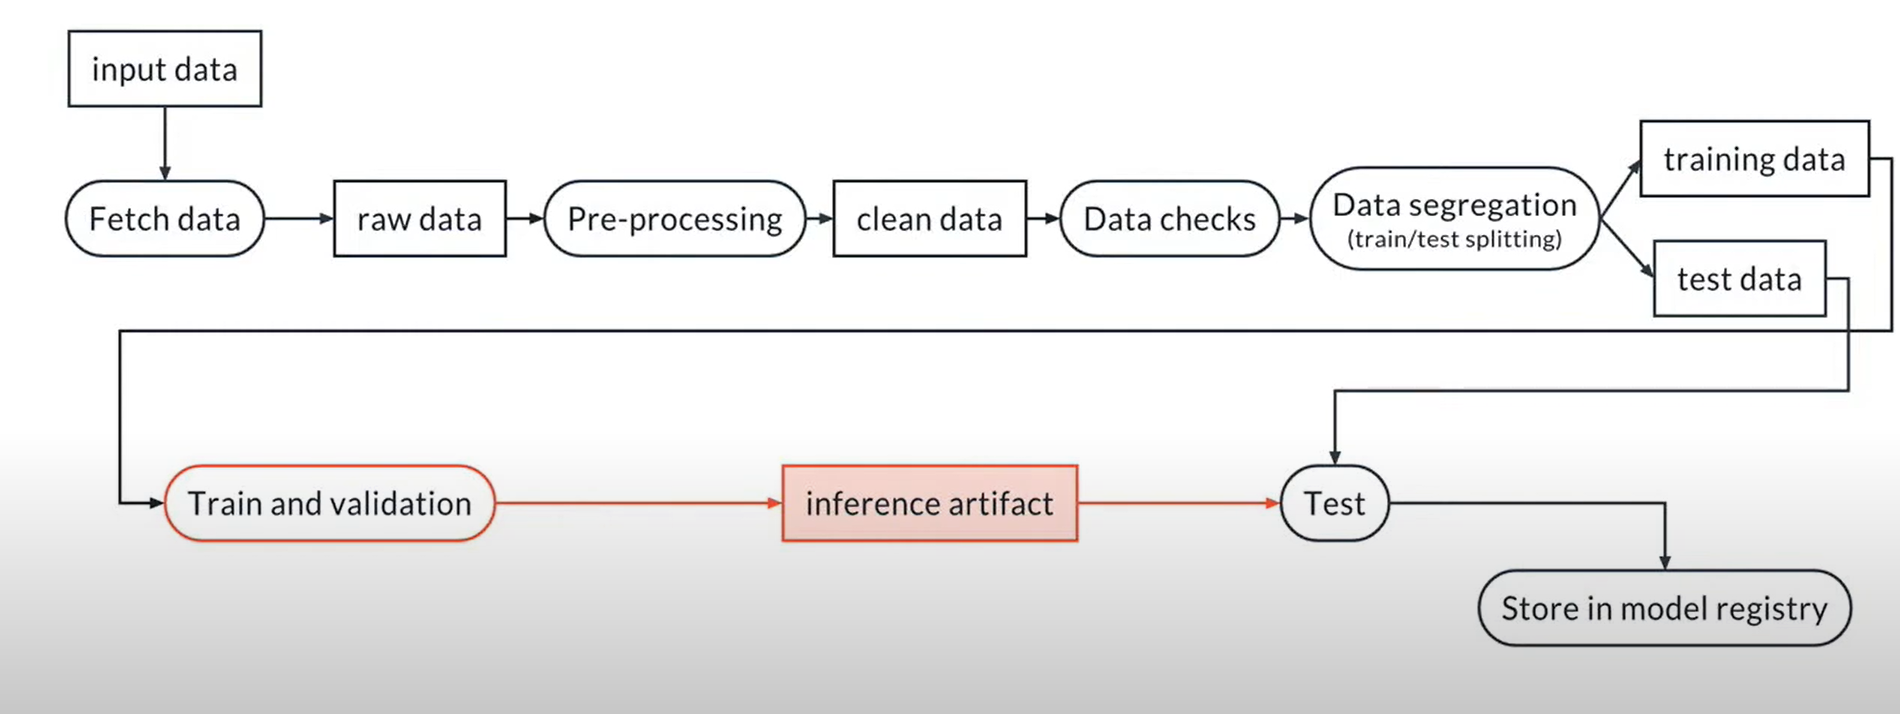

- An inference pipeline is an ML pipeline that contains everything that needs to run in production at inference time: a pre-processing step that transforms the data input to the data expected by the model, and then the model.
- 
An inference artifact is a serialized (i.e., saved to disk) static version of the inference pipeline containing the preprocessing as well as a trained model

An inference pipeline using scikit-learn looks like this:
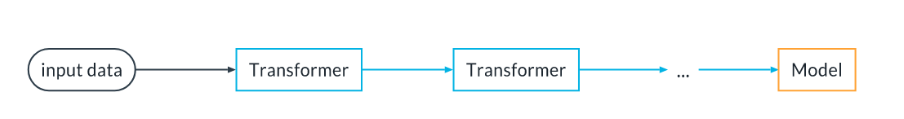
It is a sequence of Transformers, which receive the input and transform it in some way, followed by a model that receives the transformed input and returns an output (a classification or a regression prediction)

.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline

pipe = Pipeline(
  steps=[
    ("imputer", SimpleImputer()),
    ("scaler", StandardScaler()),
    ("model", LogisticRegression())
  ]
)

# OR
pipe = make_pipeline(SimpleImputer(), StandardScaler(), LogisticRegression())

pipe.fit(X_train, y_train)
pipe.predict(X_test)
pipe.predict_proba(X_test)


A pipeline can be a lot more complex than this, of course.

Sometimes we want to apply a different preprocessing to groups of columns in a dataframe. For that we can use the ColumnTransformer class in sklearn:

In [ ]:
Explain
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline


# Example dataframe from the sklearn docs
df = pd.DataFrame(
    {'city': ['London', 'London', 'Paris', 'Sallisaw'],
     'title': ["His Last Bow", "How Watson Learned the Trick",
               "A Moveable Feast", "The Grapes of Wrath"],
     'expert_rating': [5, 3, 4, 5],
     'user_rating': [4, 5, 4, 3],
     'click': ['yes', 'no', 'no', 'yes']})
y = df.pop("click")
X = df

# Build a Column transformer
categorical_preproc = OneHotEncoder()
text_preproc = TfidfVectorizer()
numerical_preprocessing = make_pipeline(SimpleImputer(), StandardScaler())
preproc = ColumnTransformer(
    transformers=[
        ("cat_transform", categorical_preproc, ['city']),
        ("text_transform", text_preproc, 'title'),
        ("num_transform", numerical_preprocessing, ['expert_rating', 'user_rating'])
    ],
    remainder='drop'
)
pipe = make_pipeline(preproc, LogisticRegression())
pipe.fit(X, y)

## Experimentation
### How can we make experiments in MLOPS?
- 
Version our dat- a
Version our co- de
Track every experi

### How can we track the experiments?
##### Track the configuration of a run (hyperparameters)
We should put in the configuration all the input parameters that stay constant during the run (hyperparameter): }
  }
)
ment

In [ ]:
run.config.update(
  {
    "batch_size": 128,
    "weight_decay": 0.01,
    # NOTE that we can use nested structures
    "augmentations": {
      "rot_angle": 45,
      "crop_size": 224
    }
  }
)

#If our script is using argparse, we can also say (assuming args is the result of parse_args):
run.config.update(args)



#### Tracking scores, metrics and results
To track a score, i.e. a final number that is a score for the run, we can use the .summary dictionary within the run instance:


In [ ]:
run.summary['accuracy'] = 0.9


Instead, to track something that changes with time we can use the .log method. For example:



In [ ]:
for i in range(10):
  run.log(
    {
      # Make up something that varies with the iteration
      "loss": 1.2 - i*0.1
      "recall": 0.8 + i * 0.01
    }
  )

#### Logging Figures & Viewing MetricsAssuming that the figure to track is in a matplotlib figure fig we can store it on W&B by doing:




In [ ]:
run.log(
  {
    "my_figure": wandb.Image(fig)
  }
)

### Hydra Sweeps (Hyperparameters Optimization)
Hydra can be used to perform parameter sweeps: given a grid of parameter values, hydra will generate multiple jobs and go through the grid automatically.

If we want Hydra to do a sweep, we need to specify the values we want to explore and then the options -m ("multi-run"). So for example:

In [ ]:
mlflow run . -P hydra_options="-m parameters.a=3,4,5" #will generate 3 runs. The first one will have a=3, the second a=4 and the third a=5.
mlflow run . -P hydra_options="-m parameters.a=3,4 parameters.b=2,3,4" #Multiple parameters :  (a=3, b=2), (a=4, b=2), (a=3, b=3), (a=4, b=3), (a=3, b=4)
mlflow run . -P hydra_options="-m parameters.a=3,4 parameters.b=range(2,4,1)" 
mlflow run . -P hydra_options="hydra/launcher=joblib parameters.a=3,4 parameters.b=range(2,4,1) -m" #To run the jobs parallel

## Export Your Inference PipelineExporting means packaging our inference pipeline into a format that can be saved to disk and reused by downstream tasks, for example our production environment.

MLflow provides a standard format for model exports that is accepted by many downstream tools.

When generating the model export we can provide two optional but important elements:

- A signature, which contains the input and output schema for the data.
- This allows downstream tools to catch obvious schema problems.
Some input examples: these are invaluable for testing that everything works in downstream tas
  
Normally MLflow figures out automatically the environment that the model need to work appropriately. However, this environment can also be explicitly controlled. Finally, the exported model can be easily converted to a Docker image that provides a REST API for the model.

k


In [ ]:
from sklearn.pipeline import Pipeline
import mlflow.sklearn
from mlflow.models import infer_signature

# Define and fit pipeline
pipe = Pipeline(...)
pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)

signature = infer_signature(X_test, pred)

# Get signature and export inference artifact
export_path = "model_dir"

mlflow.sklearn.save_model(
  pipe,  # our pipeline
  export_path,  # Path to a directory for the produced package
  signature=signature, # input and output schema
  input_example=X_test.iloc[:5]  # the first few examples
)

artifact = wandb.Artifact(...)
# NOTE that we use .add_dir and not .add_file
# because the export directory contains several
# files
artifact.add_dir(export_path)
run.log_artifact(artifact)

## Test Your Final Artifact and Mark for Production
We evaluate the inference artifact against the test dataset after export, i.e., we load the exported inference artifact in a different component (the test component) and we evaluate its performances. We do this so we are testing exactly what will be used in production.

Thus, within the component evaluating the inference artifact we can do:

In [ ]:
model_export_path = run.use_artifact(args.model_export).download()
pipe = mlflow.sklearn.load_model(model_export_path)
pred_proba = pipe.predict_proba(X_test)
score = roc_auc_score(y_test, pred_proba, average="macro", multi_class="ovo")
run.summary["AUC"] = score

For every experiment we are exporting the model and tracking that artifact in W&B. When we have selected the best-performing model among all the experiments we have performed we can therefore navigate to the inference artifact for that run and mark it as "production ready". In W&B, this can be accomplished for example by adding the tag prod for that artifact version. Only one version of the artifact can have a certain tag, so the one we marked for production is going to be the only one with that label. We can therefore refer to it, like in model_export:prod.

## Release for Reproducibility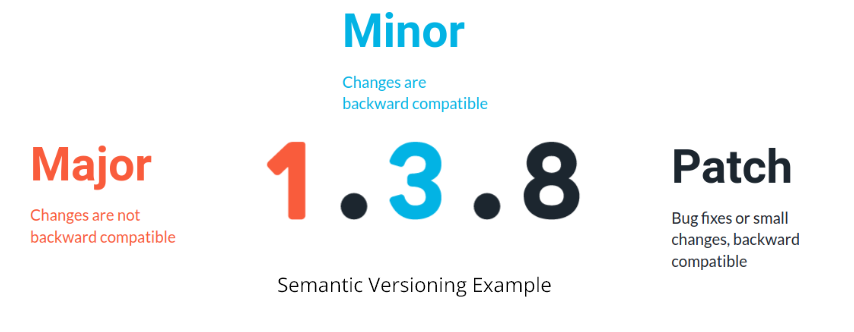
A common schema for versioning release is called Semantic Versioning: a release is made of 3 numbers, like 1.3.8. The first number is called the major version. We only increment the major version when we are making changes that break backward compatibility (i.e., a code that was running with the previous version is likely to break with the new version). The second number is called minor. We increment it when we make a significant change that is backward-compatible, i.e., code that was running with the previous version is not expected to break with the new one. And finally, we have a path number. We increment it for bug fixes and small changes that do not significantly change the behavior of the code (excluding the bugs fixed).

You can make a release on github
